##import the important libiraries

In [14]:
import nltk
import spacy

from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

nltk.download('stopwords')

import matplotlib.pyplot as plt
nltk.download('punkt')
from wordcloud import WordCloud
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##main code

**replacing anything other than a-z capital or small with a space and split the text into a list of sentences then pop the last element**

In [15]:

def read_text(text):
    sentences = [sentence.replace("[^a-zA-Z]", " ").split(" ") for sentence in text.split(". ")]
    sentences.pop()
    return sentences

bag of words is used

initialize the stop words

lower casing the 2 sentences  

all_words stores the unique values in it

vectors stores the frequency of the words



In [16]:
def sentence_similarity(sentence_1, sentence_2, stopwords=None):
    if stopwords is None:
        stopwords = []
    sentence_1 = [w.lower() for w in sentence_1]
    sentence_2 = [w.lower() for w in sentence_2]
    all_words = list(set(sentence_1 + sentence_2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

# Count word occurrences in sentence_1
    for w in sentence_1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
#Count word occurrences in sentence_2
    for w in sentence_2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
#it calculates the similarity by subtracting the cosine distance from 1.
    return 1 - cosine_distance(vector1, vector2)


In [17]:
def gen_sim_matrix(sentences, stop_words):
#Initialize a square matrix filled with zeros. The size of the matrix is determined by the number of sentences.
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2:
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)
    return similarity_matrix

In [18]:
def generate_summary(text, top_n=5):

    stop_words = stopwords.words('english')
    summarize_text = []
    sentences = read_text(text)
    sentence_similarity_matrix = gen_sim_matrix(sentences, stop_words)
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    ranked_sentence = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

    # Check if there are enough sentences to summarize
    for i in range(min(top_n, len(ranked_sentence))):
        summarize_text.append(" ".join(ranked_sentence[i][1]))

    return ". ".join(summarize_text)

# Provided text
provided_text = """Natural Language Processing (NLP) and Artificial Intelligence (AI) have revolutionized the way we interact with technology, enabling machines to understand and respond to human language. In the realm of NLP, stopwords play a crucial role in language processing, acting as the unsung heroes that are often overlooked. Stopwords are common words like "the," "and," "is," and "in" that are typically filtered out during language analysis to focus on the more meaningful content. In the context of NLP, the challenge lies in striking a balance between eliminating stopwords for efficiency and retaining them for context. AI algorithms are tasked with deciphering the intricacies of language, discerning the nuances that stopwords can convey. The journey of NLP and AI involves grappling with these linguistic building blocks. It's not merely about recognizing words but understanding their relationships, context, and underlying meanings. Stopwords, though seemingly mundane, serve as linguistic connectors that bind sentences and ideas together. In the grand tapestry of language comprehension, they are the glue that holds the narrative cohesively. In the pursuit of creating intelligent systems, AI developers confront the paradox of stopwords – the need to discard them for computational efficiency while acknowledging their significance in preserving the richness of language. It's a delicate dance where algorithms strive to extract meaning from the linguistic haystack while navigating through the haystack itself, often filled with stopwords. NLP and AI enthusiasts delve into the intricate dance of data, algorithms, and language, contemplating the role of stopwords in the grand symphony of artificial intelligence. As technology advances, the interplay between stopwords and language models continues to shape the evolving landscape of NLP, propelling us into a future where machines not only understand our words but grasp the subtleties woven by stopwords in the fabric of human communication."""



In [19]:
# Generate and print the summary

summary = generate_summary(provided_text)
print(summary)

NLP and AI enthusiasts delve into the intricate dance of data, algorithms, and language, contemplating the role of stopwords in the grand symphony of artificial intelligence. In the realm of NLP, stopwords play a crucial role in language processing, acting as the unsung heroes that are often overlooked. In the pursuit of creating intelligent systems, AI developers confront the paradox of stopwords – the need to discard them for computational efficiency while acknowledging their significance in preserving the richness of language. Stopwords are common words like "the," "and," "is," and "in" that are typically filtered out during language analysis to focus on the more meaningful content. AI algorithms are tasked with deciphering the intricacies of language, discerning the nuances that stopwords can convey


In [20]:
def count_letters_alpha(text):
    letter_count = sum(char.isalpha() for char in text)
    return letter_count

provided_text = """Natural Language Processing (NLP) and Artificial Intelligence (AI) have revolutionized the way we interact with technology, enabling machines to understand and respond to human language. In the realm of NLP, stopwords play a crucial role in language processing, acting as the unsung heroes that are often overlooked. Stopwords are common words like "the," "and," "is," and "in" that are typically filtered out during language analysis to focus on the more meaningful content. In the context of NLP, the challenge lies in striking a balance between eliminating stopwords for efficiency and retaining them for context. AI algorithms are tasked with deciphering the intricacies of language, discerning the nuances that stopwords can convey. The journey of NLP and AI involves grappling with these linguistic building blocks. It's not merely about recognizing words but understanding their relationships, context, and underlying meanings. Stopwords, though seemingly mundane, serve as linguistic connectors that bind sentences and ideas together. In the grand tapestry of language comprehension, they are the glue that holds the narrative cohesively. In the pursuit of creating intelligent systems, AI developers confront the paradox of stopwords – the need to discard them for computational efficiency while acknowledging their significance in preserving the richness of language. It's a delicate dance where algorithms strive to extract meaning from the linguistic haystack while navigating through the haystack itself, often filled with stopwords. NLP and AI enthusiasts delve into the intricate dance of data, algorithms, and language, contemplating the role of stopwords in the grand symphony of artificial intelligence. As technology advances, the interplay between stopwords and language models continues to shape the evolving landscape of NLP, propelling us into a future where machines not only understand our words but grasp the subtleties woven by stopwords in the fabric of human communication."""

r = count_letters_alpha(provided_text)
print(f'The number of letters in the provided text is: {r}')
k = count_letters_alpha(summary)
print(f'The number of letters in the provided text is: {k}')


The number of letters in the provided text is: 1661
The number of letters in the provided text is: 669


In [21]:
print("the text is shortened by ",k/r*100,"%" )
print("and less words than the original text by ",r-k, " words")


the text is shortened by  40.27694160144491 %
and less words than the original text by  992  words


([<matplotlib.patches.Wedge at 0x7da88bb10d90>,
 [Text(-1.0490799877624082, -0.3308038380618121, 'original Text'),
  Text(1.0490799877624082, 0.33080383806181246, 'Summary')],
 [Text(-0.5722254478704044, -0.18043845712462478, '59.7%'),
  Text(0.5722254478704044, 0.18043845712462495, '40.3%')])

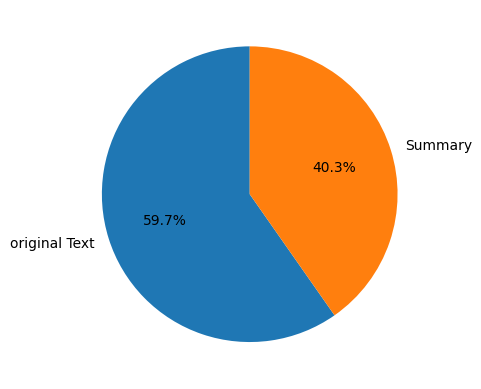

In [22]:
import matplotlib.pyplot as plt

labels = ['original Text', 'Summary']
percentage_summary = (k / r) * 100
percentage_provided_text = 100 - percentage_summary

plt.pie([percentage_provided_text,percentage_summary], labels=labels, autopct='%1.1f%%', startangle=90)



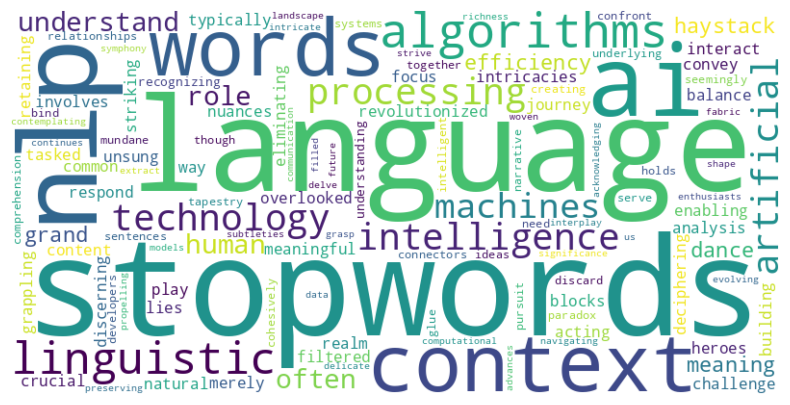

In [25]:

words = nltk.word_tokenize(provided_text)

# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

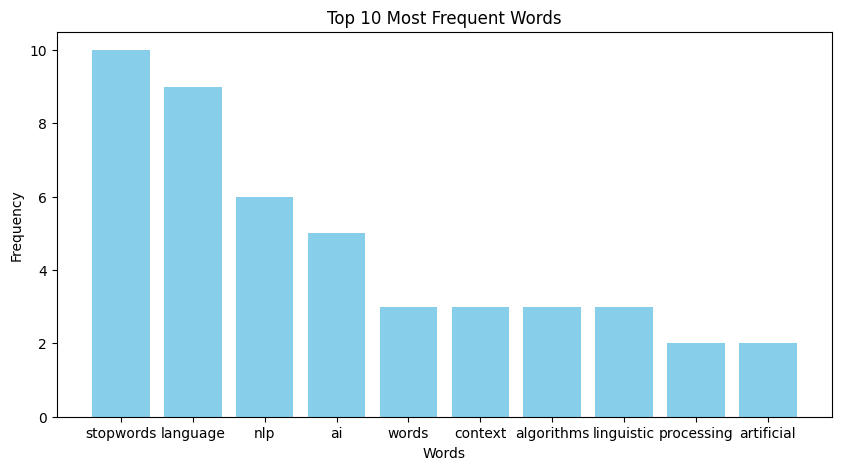

In [26]:
# Calculate word frequencies
word_freq = Counter(words)

# Get the most common words
num_top_words = 10
top_words = dict(word_freq.most_common(num_top_words))

# Generate a bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {num_top_words} Most Frequent Words')
plt.show()
